# Proteomics PCA

Notebook for performing PCA on the protein count files.

2020-11-16

## Initial boilerplate

In [1]:
import os
from dotenv import load_dotenv, find_dotenv
from os.path import join, dirname, basename, exists, isdir

### Load environmental variables from the project root directory ###
# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)

# now you can get the variables using their names

# Check whether a network drive has been specified
DATABASE = os.environ.get("NETWORK_URL")
if DATABASE == 'None':
    pass
else:
    pass
    #mount network drive here

# set up directory paths
CURRENT_DIR = os.getcwd()
PROJ = dirname(dotenv_path) # project root directory

DATA = join(PROJ, 'data') #data directory
RAW_EXTERNAL = join(DATA, 'raw_external') # external data raw directory
RAW_INTERNAL = join(DATA, 'raw_internal') # internal data raw directory
INTERMEDIATE = join(DATA, 'intermediate') # intermediate data directory
FINAL = join(DATA, 'final') # final data directory

RESULTS = join(PROJ, 'results') # output directory
FIGURES = join(RESULTS, 'figures') # figure output directory
PICTURES = join(RESULTS, 'pictures') # picture output directory


# make folders specific for certain data
folder_name = ''
if folder_name != '':
    #make folders if they don't exist
    if not exists(join(RAW_EXTERNAL, folder_name)):
        os.makedirs(join(RAW_EXTERNAL, folder_name))

    if not exists(join(INTERMEDIATE, folder_name)):
        os.makedirs(join(INTERMEDIATE, folder_name))

    if not exists(join(FINAL, folder_name)):
        os.makedirs(join(FINAL, folder_name))

print('Standard variables loaded, you are good to go!')

Python-dotenv could not parse statement starting at line 1


Standard variables loaded, you are good to go!


## 1. Loading data

We load the outputs from featureCounts:

In [2]:
import pandas as pd

data_file_names = []
data_file_names.append("proteinCounts_on_Control1.tabular")
data_file_names.append("proteinCounts_on_Control4.tabular")
data_file_names.append("proteinCounts_on_Control5.tabular")
data_file_names.append("proteinCounts_on_KCl2.tabular")
data_file_names.append("proteinCounts_on_KCl3.tabular")
data_file_names.append("proteinCounts_on_KCl4.tabular")
data_file_names.append("proteinCounts_on_NaCl1.tabular")
data_file_names.append("proteinCounts_on_NaCl2.tabular")
data_file_names.append("proteinCounts_on_NaCl3.tabular")

protein_counts = pd.DataFrame()
for data_file_name in data_file_names:
    full_name = join(INTERMEDIATE,data_file_name)
    new_data = pd.read_csv(full_name, index_col=0, sep="\t")
    if protein_counts.empty:
        protein_counts = new_data
    else:
        protein_counts = pd.merge(protein_counts, new_data, left_index=True, right_index=True)
protein_counts

,Control1,Control4,Control5,KCl2,KCl3,KCl4,NaCl1,NaCl2,NaCl3
ProteinID,,,,,,,,,
A9RAG1,3.413939e+04,1.989405e+04,2.374892e+04,10257.12500,22008.81250,5921.660645,18731.65820,13975.84570,17955.03320
A9RAH5,8.905637e+04,0.000000e+00,9.103896e+04,61969.01563,115060.30470,44673.667970,115084.92970,108176.10940,98532.03125
B5RSM9,6.409729e+05,5.430246e+05,4.067811e+05,245296.93750,323050.93750,283788.187500,323429.06250,286589.09380,316030.50000
B5RSP1,1.875413e+04,2.950164e+04,2.493053e+04,14491.97559,32582.17969,7516.210938,25389.25781,18136.23242,19271.45117
B5RSP3,0.000000e+00,0.000000e+00,1.743827e+04,75336.92969,62537.53516,35365.816410,42202.92578,80577.25781,0.00000
...,...,...,...,...,...,...,...,...,...
W0TYT3,3.379782e+04,4.605775e+04,2.732377e+04,26127.00391,30902.94336,20457.132810,31262.00781,28475.68555,31251.72852
W0TYU0,7.810343e+04,1.174860e+05,8.115009e+04,55266.62500,67995.65625,58573.984380,72456.68750,62146.10938,69709.16406
W0TYU1,4.165645e+04,3.258390e+04,2.827518e+04,24913.87500,40868.91797,18871.992190,41715.14844,32748.48633,34580.36328


There are some rows that have 2 protein IDs. We will correct them:

In [3]:
# Convert dataframe to mass based:
for (row_name, row) in protein_counts.iterrows():
    if '_' in row_name:
        new_name = row_name.split('_')[0]
        protein_counts = protein_counts.rename(index={row_name: new_name})
        print(f"{row_name} -> {new_name}")

Q6BGP9_Q6BVH2 -> Q6BGP9
Q6BHV7_Q6BX12 -> Q6BHV7
Q6BKE0_Q6BRR6 -> Q6BKE0
Q6BKW7_Q6BRG2 -> Q6BKW7
Q6BR22_Q6BVR0 -> Q6BR22
Q6BWL7_Q6BWL8 -> Q6BWL7


## 2. PCA

We will implement a PCA function that can be called several times later:

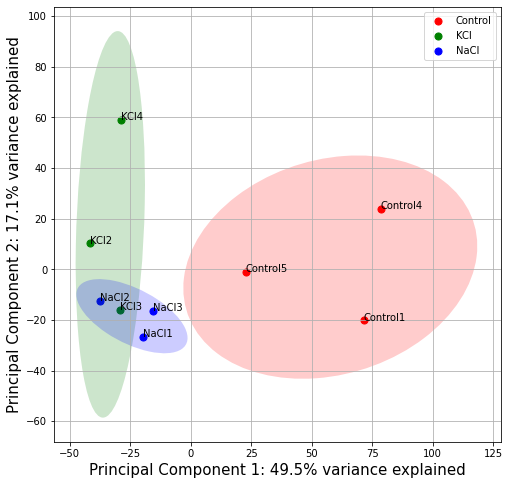

In [4]:
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import numpy as np
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

# function for running and plotting a PCA:
def plot_PCA(feature_counts):

    # transpose data (variables should be the genes)
    feature_counts = feature_counts.transpose()

    # normalize the data:
    x = feature_counts.loc[:, ].values
    x = StandardScaler().fit_transform(x)

    # run PCA:
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)

    #transform PCA results to dataframe
    pca_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
    pca_df.index = feature_counts.index
    groups = ["Control", "KCl", "NaCl"]
    for (idx, row) in pca_df.iterrows():
        for group in groups:
            if group in idx:
                pca_df.loc[idx,"group"] = group

    # get % of variability from each component
    exp_var_1 = round(pca.explained_variance_ratio_[0]*100, 1)
    exp_var_2 = round(pca.explained_variance_ratio_[1]*100, 1)

    # plot results
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel(f'Principal Component 1: {exp_var_1}% variance explained', fontsize = 15)
    ax.set_ylabel(f'Principal Component 2: {exp_var_2}% variance explained', fontsize = 15)
    colors = ["r","g","b"]  # RGB
    for group, color in zip(groups,colors):
        to_keep = pca_df['group'] == group
        x = pca_df.loc[to_keep, 'PC1']
        y = pca_df.loc[to_keep, 'PC2']
        ax.scatter(x, y, c=color, s=50)
        confidence_ellipse(x, y, ax, n_std=2, edgecolor="none", facecolor=color, alpha=0.2, label='_nolegend_')
    ax.legend(groups)
    for (idx, row) in pca_df.iterrows():
        ax.text(row["PC1"], row["PC2"], idx)
    ax.grid()

plot_PCA(protein_counts)

## 3. Effect of data normalization

We will transform the protein counts [molecules/sample] to normalized counts [molecules/g], by using the molecular weight information from uniprot:

In [5]:
# Load molecular weights (Da = g/mol) as dictionary:
mws = {}
with open(join(RAW_EXTERNAL,'uniprot_mws.tab')) as f:
    for line in f:
       (key, val) = line.split()
       mws[key] = int(val)

# Convert dataframe to mass-based:
for (row_name, row) in protein_counts.iterrows():
    protein_counts.loc[row_name,:] *= mws[row_name]
protein_counts

,Control1,Control4,Control5,KCl2,KCl3,KCl4,NaCl1,NaCl2,NaCl3
ProteinID,,,,,,,,,
A9RAG1,9.681589e+08,5.641753e+08,6.734956e+08,2.908818e+08,6.241479e+08,1.679324e+08,5.312111e+08,3.963410e+08,5.091868e+08
A9RAH5,5.339731e+09,0.000000e+00,5.458605e+09,3.715600e+09,6.898901e+09,2.678588e+09,6.900377e+09,6.486131e+09,5.907882e+09
B5RSM9,1.242558e+11,1.052680e+11,7.885654e+10,4.755204e+10,6.262504e+10,5.501376e+10,6.269834e+10,5.555673e+10,6.126409e+10
B5RSP1,1.623752e+09,2.554282e+09,2.158510e+09,1.254730e+09,2.820998e+09,6.507611e+08,2.198227e+09,1.570253e+09,1.668542e+09
B5RSP3,0.000000e+00,0.000000e+00,3.338818e+09,1.442439e+10,1.197375e+10,6.771316e+09,8.080383e+09,1.542772e+10,0.000000e+00
...,...,...,...,...,...,...,...,...,...
W0TYT3,6.506419e+08,8.866577e+08,5.260098e+08,5.029710e+08,5.949126e+08,3.938203e+08,6.018249e+08,5.481854e+08,6.016270e+08
W0TYU0,5.363441e+09,8.067884e+09,5.572658e+09,3.795214e+09,4.669330e+09,4.022334e+09,4.975673e+09,4.267635e+09,4.786998e+09
W0TYU1,1.205538e+09,9.429781e+08,8.182836e+08,7.210075e+08,1.182746e+09,5.461555e+08,1.207236e+09,9.477412e+08,1.000756e+09


Now let's see the column sums for each condition:

In [6]:
scaling_factor = protein_counts.sum(axis=0)
scaling_factor

Control1    1.313677e+14
Control4    1.266739e+14
Control5    1.100170e+14
KCl2        1.110972e+14
KCl3        1.175625e+14
KCl4        1.019635e+14
NaCl1       1.141858e+14
NaCl2       1.148601e+14
NaCl3       1.147923e+14
dtype: float64

Let's normalize this, under the assumption that the same amount of mass was injected in the MS for each sample:

In [7]:
for (column_name, column) in protein_counts.iteritems():
    protein_counts[column_name] = column/scaling_factor[column_name]
protein_counts

,Control1,Control4,Control5,KCl2,KCl3,KCl4,NaCl1,NaCl2,NaCl3
ProteinID,,,,,,,,,
A9RAG1,0.000007,0.000004,0.000006,0.000003,0.000005,0.000002,0.000005,0.000003,0.000004
A9RAH5,0.000041,0.000000,0.000050,0.000033,0.000059,0.000026,0.000060,0.000056,0.000051
B5RSM9,0.000946,0.000831,0.000717,0.000428,0.000533,0.000540,0.000549,0.000484,0.000534
B5RSP1,0.000012,0.000020,0.000020,0.000011,0.000024,0.000006,0.000019,0.000014,0.000015
B5RSP3,0.000000,0.000000,0.000030,0.000130,0.000102,0.000066,0.000071,0.000134,0.000000
...,...,...,...,...,...,...,...,...,...
W0TYT3,0.000005,0.000007,0.000005,0.000005,0.000005,0.000004,0.000005,0.000005,0.000005
W0TYU0,0.000041,0.000064,0.000051,0.000034,0.000040,0.000039,0.000044,0.000037,0.000042
W0TYU1,0.000009,0.000007,0.000007,0.000006,0.000010,0.000005,0.000011,0.000008,0.000009


We can confirm the normalization is working as expected by checking the sum of each sample:

In [8]:
protein_counts.sum(axis=0)

Control1    1.0
Control4    1.0
Control5    1.0
KCl2        1.0
KCl3        1.0
KCl4        1.0
NaCl1       1.0
NaCl2       1.0
NaCl3       1.0
dtype: float64

Now let's convert back to molar amounts:

In [9]:
for (row_name, row) in protein_counts.iterrows():
    protein_counts.loc[row_name,:] /= mws[row_name]
protein_counts

,Control1,Control4,Control5,KCl2,KCl3,KCl4,NaCl1,NaCl2,NaCl3
ProteinID,,,,,,,,,
A9RAG1,2.598765e-10,1.570493e-10,2.158659e-10,9.232565e-11,1.872094e-10,5.807627e-11,1.640454e-10,1.216771e-10,1.564133e-10
A9RAH5,6.779167e-10,0.000000e+00,8.274992e-10,5.577908e-10,9.787159e-10,4.381339e-10,1.007874e-09,9.418076e-10,8.583509e-10
B5RSM9,4.879227e-09,4.286790e-09,3.697439e-09,2.207948e-09,2.747908e-09,2.783233e-09,2.832480e-09,2.495115e-09,2.753065e-09
B5RSP1,1.427606e-10,2.328944e-10,2.266062e-10,1.304441e-10,2.771477e-10,7.371471e-11,2.223503e-10,1.578985e-10,1.678811e-10
B5RSP3,0.000000e+00,0.000000e+00,1.585053e-10,6.781170e-10,5.319513e-10,3.468478e-10,3.695986e-10,7.015253e-10,0.000000e+00
...,...,...,...,...,...,...,...,...,...
W0TYT3,2.572765e-10,3.635930e-10,2.483595e-10,2.351724e-10,2.628639e-10,2.006319e-10,2.737818e-10,2.479163e-10,2.722460e-10
W0TYU0,5.945405e-10,9.274682e-10,7.376143e-10,4.974617e-10,5.783787e-10,5.744603e-10,6.345506e-10,5.410592e-10,6.072637e-10
W0TYU1,3.170981e-10,2.572266e-10,2.570074e-10,2.242529e-10,3.476356e-10,1.850857e-10,3.653268e-10,2.851163e-10,3.012430e-10


We can now repeat yet again the PCA:

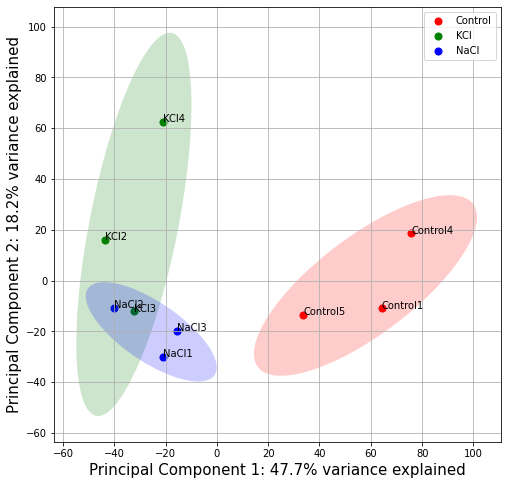

In [10]:
plot_PCA(protein_counts)

We see ~66% of the variability explained, and the control well separated from the two types of stress.